#Next Movie Selection Report for SussexBudgetProductions

This report is conducted for the selection of the next movie of Sussex Budget Productions that have £1.5 million budget for it.

My purpose is to find the most profitable movie within this budget. After exploring the data, I will determine appropriate hypotheses to get meaningful results. After testing my hypotheses, I will share the conclusions.


In [15]:
#reading of data file

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd



myfile = 'movie_metadata.csv'

df = pd.read_csv(myfile,index_col=None)

To find out which data I have about movies, I will look at the keys


In [16]:
df.keys()

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

I will find how many NaN values for each column to wrangle the data

In [17]:
for key in df.keys():  
  print('NaN values in {} is {}'.format(key, df[key].isna().sum())  )

NaN values in color is 19
NaN values in director_name is 104
NaN values in num_critic_for_reviews is 50
NaN values in duration is 15
NaN values in director_facebook_likes is 104
NaN values in actor_3_facebook_likes is 23
NaN values in actor_2_name is 13
NaN values in actor_1_facebook_likes is 7
NaN values in gross is 884
NaN values in genres is 0
NaN values in actor_1_name is 7
NaN values in movie_title is 0
NaN values in num_voted_users is 0
NaN values in cast_total_facebook_likes is 0
NaN values in actor_3_name is 23
NaN values in facenumber_in_poster is 13
NaN values in plot_keywords is 153
NaN values in movie_imdb_link is 0
NaN values in num_user_for_reviews is 21
NaN values in language is 12
NaN values in country is 5
NaN values in content_rating is 303
NaN values in budget is 492
NaN values in title_year is 108
NaN values in actor_2_facebook_likes is 13
NaN values in imdb_score is 0
NaN values in aspect_ratio is 329
NaN values in movie_facebook_likes is 0


 I will delete the NaN values to wrangle the data

In [18]:
#drop rows with columns have NaN values 
df=df.dropna()

I want to determine all of the movies profits. I will add a column using profit=gross-budget.

In [19]:
#create a profit column
df['profit']=df['gross']-df['budget']

df.head()

<ipython-input-19-dea6536d911a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit']=df['gross']-df['budget']


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


I will split data into two parts. One is train and the other is test. I use train data to exploration and test data to test my hypotheses

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.5, random_state=7)
#random_state will keep constant the splitted data to not change when I explore like seed in random library

In [21]:
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
2333,Color,Angelina Jolie Pitt,131.0,122.0,11000.0,188.0,Angelina Jolie Pitt,11000.0,531009.0,Drama|Romance,...,English,USA,R,10000000.0,2015.0,11000.0,5.3,2.35,0,-9468991.0
3603,Color,Donald Petrie,34.0,104.0,80.0,658.0,Lili Taylor,8000.0,12793213.0,Comedy|Drama|Romance,...,English,USA,R,6000000.0,1988.0,960.0,6.2,1.85,0,6793213.0
191,Color,Chris Miller,246.0,90.0,50.0,397.0,Constance Marie,4000.0,149234747.0,Action|Adventure|Animation|Comedy|Family|Fantasy,...,English,USA,PG,130000000.0,2011.0,442.0,6.7,2.35,16000,19234747.0
480,Color,James Algar,129.0,74.0,11.0,62.0,Penn Jillette,340.0,60507228.0,Animation|Family|Fantasy|Music,...,English,USA,G,80000000.0,1999.0,243.0,7.3,1.78,607,-19492772.0
2225,Color,David Ayer,190.0,109.0,453.0,2000.0,Chris Evans,18000.0,26415649.0,Action|Crime|Drama|Thriller,...,English,USA,R,20000000.0,2008.0,11000.0,6.8,2.35,0,6415649.0


To explore numerical data, I will look at the statistical values.

In [22]:
train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1.878000e+03,1.878000e+03,1878.000000,1878.000000,1878.000000,1.878000e+03,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1.878000e+03
mean,168.521299,110.596379,849.269436,688.360490,7297.740149,5.208696e+07,1.068418e+05,10844.571885,1.314164,349.083600,4.754317e+07,2002.915868,1931.792865,6.501438,2.115053,9027.463791,4.543789e+06
std,125.097900,21.988398,3227.046090,1594.148625,17635.090737,7.002186e+07,1.547932e+05,20967.368956,1.796321,441.074329,2.898616e+08,9.770208,4909.060106,1.025552,0.418903,20811.003853,2.928222e+08
min,2.000000,73.000000,0.000000,0.000000,2.000000,1.620000e+02,9.100000e+01,2.000000,0.000000,4.000000,1.100000e+03,1927.000000,0.000000,2.100000,1.330000,0.000000,-1.221330e+10
25%,77.000000,96.000000,11.000000,194.000000,721.250000,7.994779e+06,2.045350e+04,1845.250000,0.000000,110.000000,1.000000e+07,1999.000000,365.250000,5.900000,1.850000,0.000000,-1.073104e+07
50%,140.000000,106.000000,62.000000,431.000000,1000.000000,2.860397e+07,5.401550e+04,3896.500000,1.000000,212.000000,2.500000e+07,2004.000000,663.500000,6.600000,2.350000,209.500000,1.164184e+06
75%,228.000000,121.000000,243.750000,686.500000,12000.000000,6.646783e+07,1.285212e+05,15406.500000,2.000000,398.000000,5.000000e+07,2010.000000,966.750000,7.200000,2.350000,11000.000000,2.616714e+07
max,775.000000,293.000000,23000.000000,19000.000000,640000.000000,6.586723e+08,1.676169e+06,656730.000000,15.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.200000,16.000000,349000.000000,4.586723e+08


In order to find is there any numerical value related to profit, I will look at the correlation coefficients of Pearson's. The correlated ones will have a value more than 0.1 (positive correlation) or less than -0.1 (negative correlation) 

Pearson's correlation between profit and gross coefficient is (0.16163085747652237, 1.8396028598871937e-12)


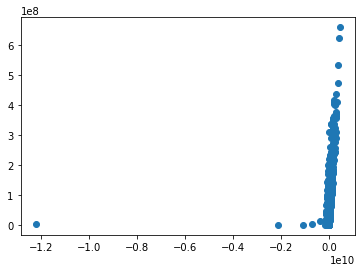

Pearson's correlation between profit and budget coefficient is (-0.9711686076417628, 0.0)


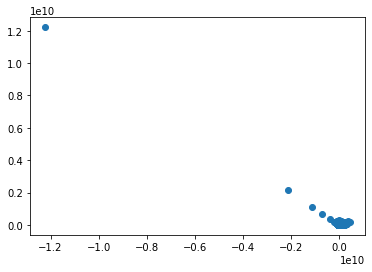

Pearson's correlation between profit and profit coefficient is (0.9999999999999999, 0.0)


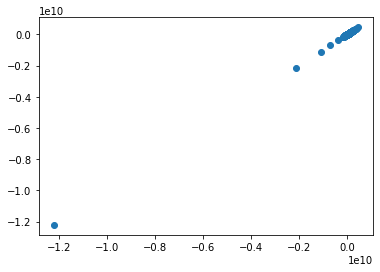

In [23]:
import scipy.stats as stats

profit_array=np.array(train['profit'])

#numerical columns list 
numericKeyList=(train.describe()).keys()

for key in numericKeyList:
  #create array of columns
  y_array=np.array(train[key]) 
  
  pearsonof2=stats.pearsonr(profit_array,y_array)
  if pearsonof2[0]>0.1 or pearsonof2[0]<-0.1 :
    print("Pearson's correlation between profit and {} coefficient is {}".format(key, pearsonof2))
    
    plt.scatter(profit_array,y_array)
    plt.show()

There is no correlation between any numerical data (including imdb score) and profit except the obvious ones from the formula profit=gross-budget. So I will explore the categorical data.


Let's see which genres are the most profitable

In [24]:
genreseries=train.groupby('genres')[['profit']].mean()

genreseries.sort_values('profit', ascending=False) 

,profit
genres,
Action|Adventure|Comedy|Romance|Sci-Fi,3.050243e+08
Animation|Comedy|Family|Sci-Fi,2.920496e+08
Adventure|Animation|Comedy|Family|Fantasy|Romance,2.864710e+08
Adventure|Drama|Sci-Fi|Thriller,2.520421e+08
Adventure|Animation|Comedy|Family|Fantasy|Musical,2.507366e+08
...,...
Adventure|Biography|Drama|History|War,-1.078164e+08
Drama|Musical,-3.502920e+08
Action|Animation|Sci-Fi,-1.099561e+09


To see which of them in our budget, reorganise the train data 

In [25]:
train_inbudget=train[train['budget']<=1500000]
train_inbudget.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4788,Color,Whit Stillman,71.0,98.0,89.0,3.0,Taylor Nichols,88.0,2938208.0,Comedy|Drama|Romance,...,English,USA,PG-13,225000.0,1990.0,74.0,7.5,1.66,865,2713208.0
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,46700000.0
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,140470114.0
4536,Color,Joe Dante,161.0,91.0,287.0,725.0,Robert Picardo,1000.0,17986000.0,Horror,...,English,USA,R,1000000.0,1981.0,823.0,6.6,1.85,0,16986000.0
4406,Color,Noah Baumbach,110.0,88.0,387.0,18.0,Elizabeth Meriwether,436.0,7362100.0,Comedy|Drama,...,English,USA,R,1500000.0,2005.0,25.0,7.4,1.85,0,5862100.0


Let's look at the profitable genres in budget

In [26]:
genreseries=train_inbudget.groupby('genres')[['profit']].mean()

genreseries.sort_values('profit', ascending=False) 

,profit
genres,
Comedy|Drama|Music,1.142230e+08
Adventure|Family|Romance,3.905260e+07
Horror|Thriller,3.870666e+07
Horror,3.465929e+07
Drama|Sport,2.546564e+07
Horror|Mystery|Thriller,2.419366e+07
Horror|Mystery|Sci-Fi|Thriller,1.711293e+07
Horror|Sci-Fi,1.650000e+07
Biography|Drama|Romance,1.519784e+07


To see whether we enough data for it or not, I will look at 'Comedy|Drama|Music' details closely.


In [27]:
train[ train['genres']=='Comedy|Drama|Music']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4674,Color,George Lucas,100.0,112.0,0.0,425.0,Ron Howard,11000.0,115000000.0,Comedy|Drama|Music,...,English,USA,PG,777000.0,1973.0,2000.0,7.5,2.35,0,114223000.0
1757,Color,Ang Lee,210.0,120.0,0.0,210.0,Kevin Chamberlin,579.0,7443007.0,Comedy|Drama|Music,...,English,USA,R,30000000.0,2009.0,489.0,6.7,1.85,0,-22556993.0
2756,Color,Gregory Jacobs,222.0,115.0,13.0,642.0,Channing Tatum,20000.0,66009973.0,Comedy|Drama|Music,...,English,USA,R,14800000.0,2015.0,17000.0,5.7,2.35,41000,51209973.0
4565,Color,Peter Cattaneo,122.0,91.0,11.0,121.0,Mark Addy,1000.0,45857453.0,Comedy|Drama|Music,...,English,UK,R,3500000.0,1997.0,891.0,7.2,1.85,0,42357453.0


Now I think a hypothesis like 'Comedy|Drama|Music' is the most profitable genre in our budget and I will do the same analysis to the other columns

In [28]:
directorseries=train_inbudget.groupby('director_name')[['profit']].mean()

directorseries.sort_values('profit', ascending=False) 

,profit
director_name,
Daniel Myrick,140470114.0
John G. Avildsen,116275247.0
George Lucas,114223000.0
William Brent Bell,52245055.0
John Carpenter,46700000.0
...,...
Jeff Garlin,-1305432.0
Bruce Campbell,-1326934.0
Pete Jones,-1380159.0


In [29]:
train[ train['director_name']=='Daniel Myrick']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,140470114.0


Not enough data for director selection

In [30]:
colorseries=train_inbudget.groupby('color')[['profit']].mean()

colorseries.sort_values('profit', ascending=False)

,profit
color,
Black and White,2.497319e+07
Color,6.900299e+06


In [31]:
train[ train['color']=='Black and White']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit


I don't know why but it cannot be found any black and white row. I will calculate it with black and white=total-color

In [32]:
train[ train['color']=='Color']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
2333,Color,Angelina Jolie Pitt,131.0,122.0,11000.0,188.0,Angelina Jolie Pitt,11000.0,531009.0,Drama|Romance,...,English,USA,R,10000000.0,2015.0,11000.0,5.3,2.35,0,-9468991.0
3603,Color,Donald Petrie,34.0,104.0,80.0,658.0,Lili Taylor,8000.0,12793213.0,Comedy|Drama|Romance,...,English,USA,R,6000000.0,1988.0,960.0,6.2,1.85,0,6793213.0
191,Color,Chris Miller,246.0,90.0,50.0,397.0,Constance Marie,4000.0,149234747.0,Action|Adventure|Animation|Comedy|Family|Fantasy,...,English,USA,PG,130000000.0,2011.0,442.0,6.7,2.35,16000,19234747.0
480,Color,James Algar,129.0,74.0,11.0,62.0,Penn Jillette,340.0,60507228.0,Animation|Family|Fantasy|Music,...,English,USA,G,80000000.0,1999.0,243.0,7.3,1.78,607,-19492772.0
2225,Color,David Ayer,190.0,109.0,453.0,2000.0,Chris Evans,18000.0,26415649.0,Action|Crime|Drama|Thriller,...,English,USA,R,20000000.0,2008.0,11000.0,6.8,2.35,0,6415649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Color,Brad Furman,184.0,88.0,65.0,681.0,John Heard,3000.0,19316646.0,Crime|Thriller,...,English,USA,R,30000000.0,2013.0,697.0,5.6,2.35,0,-10683354.0
2840,Color,Patricia Riggen,63.0,109.0,36.0,579.0,Brighton Sharbino,3000.0,61693523.0,Drama,...,English,USA,PG,13000000.0,2016.0,3000.0,6.8,1.85,16000,48693523.0
564,Color,Zack Snyder,435.0,128.0,0.0,826.0,Abbie Cornish,4000.0,36381716.0,Action|Fantasy,...,English,USA,PG-13,82000000.0,2011.0,2000.0,6.1,2.35,42000,-45618284.0
1291,Color,Barbet Schroeder,40.0,101.0,58.0,497.0,Michael Rapaport,12000.0,14942422.0,Action|Crime|Thriller,...,English,USA,R,40000000.0,1995.0,975.0,5.9,1.85,555,-25057578.0


In [33]:
len(train)

1878

There are 1810 color rows. Total 1878 rows. There are 68 Black and White rows

Another hypothesis I think is : black and white is more profitable than color movies.

In [34]:
countryseries=train_inbudget.groupby('country')[['profit']].mean()

countryseries.sort_values('profit', ascending=False)

,profit
country,
USA,9.692786e+06
Ireland,9.257933e+06
UK,3.325661e+06
Italy,2.642129e+06
Afghanistan,1.081331e+06
Iran,6.637800e+05
Denmark,3.477800e+05
France,2.224980e+05
Canada,1.038622e+05


In [35]:
train[ train['country']=='USA']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
2333,Color,Angelina Jolie Pitt,131.0,122.0,11000.0,188.0,Angelina Jolie Pitt,11000.0,531009.0,Drama|Romance,...,English,USA,R,10000000.0,2015.0,11000.0,5.3,2.35,0,-9468991.0
3603,Color,Donald Petrie,34.0,104.0,80.0,658.0,Lili Taylor,8000.0,12793213.0,Comedy|Drama|Romance,...,English,USA,R,6000000.0,1988.0,960.0,6.2,1.85,0,6793213.0
191,Color,Chris Miller,246.0,90.0,50.0,397.0,Constance Marie,4000.0,149234747.0,Action|Adventure|Animation|Comedy|Family|Fantasy,...,English,USA,PG,130000000.0,2011.0,442.0,6.7,2.35,16000,19234747.0
480,Color,James Algar,129.0,74.0,11.0,62.0,Penn Jillette,340.0,60507228.0,Animation|Family|Fantasy|Music,...,English,USA,G,80000000.0,1999.0,243.0,7.3,1.78,607,-19492772.0
2225,Color,David Ayer,190.0,109.0,453.0,2000.0,Chris Evans,18000.0,26415649.0,Action|Crime|Drama|Thriller,...,English,USA,R,20000000.0,2008.0,11000.0,6.8,2.35,0,6415649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Color,Brad Furman,184.0,88.0,65.0,681.0,John Heard,3000.0,19316646.0,Crime|Thriller,...,English,USA,R,30000000.0,2013.0,697.0,5.6,2.35,0,-10683354.0
2840,Color,Patricia Riggen,63.0,109.0,36.0,579.0,Brighton Sharbino,3000.0,61693523.0,Drama,...,English,USA,PG,13000000.0,2016.0,3000.0,6.8,1.85,16000,48693523.0
564,Color,Zack Snyder,435.0,128.0,0.0,826.0,Abbie Cornish,4000.0,36381716.0,Action|Fantasy,...,English,USA,PG-13,82000000.0,2011.0,2000.0,6.1,2.35,42000,-45618284.0
1291,Color,Barbet Schroeder,40.0,101.0,58.0,497.0,Michael Rapaport,12000.0,14942422.0,Action|Crime|Thriller,...,English,USA,R,40000000.0,1995.0,975.0,5.9,1.85,555,-25057578.0


I think that the USA movies are more profitable



In [36]:
languageseries=train_inbudget.groupby('language')[['profit']].mean()

languageseries.sort_values('profit', ascending=False)

,profit
language,
English,8.438110e+06
Italian,2.642129e+06
French,1.352472e+06
Dari,1.081331e+06
Persian,6.637800e+05
Danish,3.477800e+05
Spanish,-2.787390e+05
Indonesian,-5.157790e+05
Norwegian,-7.582910e+05


In [37]:
train[ train['language']=='English']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
2333,Color,Angelina Jolie Pitt,131.0,122.0,11000.0,188.0,Angelina Jolie Pitt,11000.0,531009.0,Drama|Romance,...,English,USA,R,10000000.0,2015.0,11000.0,5.3,2.35,0,-9468991.0
3603,Color,Donald Petrie,34.0,104.0,80.0,658.0,Lili Taylor,8000.0,12793213.0,Comedy|Drama|Romance,...,English,USA,R,6000000.0,1988.0,960.0,6.2,1.85,0,6793213.0
191,Color,Chris Miller,246.0,90.0,50.0,397.0,Constance Marie,4000.0,149234747.0,Action|Adventure|Animation|Comedy|Family|Fantasy,...,English,USA,PG,130000000.0,2011.0,442.0,6.7,2.35,16000,19234747.0
480,Color,James Algar,129.0,74.0,11.0,62.0,Penn Jillette,340.0,60507228.0,Animation|Family|Fantasy|Music,...,English,USA,G,80000000.0,1999.0,243.0,7.3,1.78,607,-19492772.0
2225,Color,David Ayer,190.0,109.0,453.0,2000.0,Chris Evans,18000.0,26415649.0,Action|Crime|Drama|Thriller,...,English,USA,R,20000000.0,2008.0,11000.0,6.8,2.35,0,6415649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,Color,Brad Furman,184.0,88.0,65.0,681.0,John Heard,3000.0,19316646.0,Crime|Thriller,...,English,USA,R,30000000.0,2013.0,697.0,5.6,2.35,0,-10683354.0
2840,Color,Patricia Riggen,63.0,109.0,36.0,579.0,Brighton Sharbino,3000.0,61693523.0,Drama,...,English,USA,PG,13000000.0,2016.0,3000.0,6.8,1.85,16000,48693523.0
564,Color,Zack Snyder,435.0,128.0,0.0,826.0,Abbie Cornish,4000.0,36381716.0,Action|Fantasy,...,English,USA,PG-13,82000000.0,2011.0,2000.0,6.1,2.35,42000,-45618284.0
1291,Color,Barbet Schroeder,40.0,101.0,58.0,497.0,Michael Rapaport,12000.0,14942422.0,Action|Crime|Thriller,...,English,USA,R,40000000.0,1995.0,975.0,5.9,1.85,555,-25057578.0


I think that movies in English are more profitable

In [38]:
plotkeywordseries=train_inbudget.groupby('plot_keywords')[['profit']].mean()
plotkeywordseries.sort_values('profit', ascending=False)

,profit
plot_keywords,
found footage|looking at the camera|lost in the woods|maryland|screaming in horror,140470114.0
boxer|hometown hero|philadelphia pennsylvania|protective male|training,116275247.0
california|car|drag racing|high school|rock 'n' roll,114223000.0
critically bashed|demonic possession|exorcism|exorcist|found footage,52245055.0
halloween|masked killer|michael myers|slasher|trick or treat,46700000.0
...,...
cheese|city|ice cream|school|second city,-1305432.0
b movie|birthday|chinese|demon|small town,-1326934.0
catholic|catholicism|rabbi|school|summer,-1380159.0


In [39]:
train[train['plot_keywords']=='found footage|looking at the camera|lost in the woods|maryland|screaming in horror']


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,140470114.0


Not enough data for plot keywords

In [40]:
actor1series=train_inbudget.groupby('actor_1_name')[['profit']].mean()

actor1series.sort_values('profit', ascending=False)

,profit
actor_1_name,
Heather Donahue,140470114.0
Sylvester Stallone,116275247.0
Harrison Ford,114223000.0
Fernanda Andrade,52245055.0
Jamie Lee Curtis,46700000.0
...,...
Jessy Schram,-1305432.0
Ted Raimi,-1326934.0
Brian Dennehy,-1380159.0


In [41]:
train[ train['actor_1_name']=='Heather Donahue']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,140470114.0


In [42]:
actor2series=train_inbudget.groupby('actor_2_name')[['profit']].mean()

actor2series.sort_values('profit', ascending=False)

,profit
actor_2_name,
Joshua Leonard,140470114.0
Burgess Meredith,116275247.0
Ron Howard,114223000.0
Claudiu Trandafir,52245055.0
Donald Pleasence,46700000.0
...,...
Jeff Garlin,-1305432.0
Dan Hicks,-1326934.0
Aidan Quinn,-1380159.0


In [43]:
train[ train['actor_2_name']=='Joshua Leonard']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,140470114.0


In [44]:
actor3series=train_inbudget.groupby('actor_3_name')[['profit']].mean()

actor3series.sort_values('profit', ascending=False)

,profit
actor_3_name,
Michael C. Williams,140470114.0
Carl Weathers,116275247.0
Mackenzie Phillips,114223000.0
Brian Johnson,52245055.0
P.J. Soles,46700000.0
...,...
Joey Slotnick,-1305432.0
Timothy Patrick Quill,-1326934.0
Bonnie Hunt,-1380159.0


In [45]:
train[ train['actor_3_name']=='Michael C. Williams']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,140470114.0


Not enough data for the actor selection. 

I will check whether there are actors in common in actor 1-2-3 lists. If there are, I will put them together to evaluate there is an effect on profit.

In [46]:
train[train['actor_2_name']==train['actor_3_name']]



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit


In [47]:
train[train['actor_1_name']==train['actor_2_name']]


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit


In [48]:
train[train['actor_3_name']==train['actor_1_name']]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit


No common actors in three actors lists so I will move on with hypothesis testing

#Hypothesis Testing

**Testable Hypothesis 1:** **If** 'Comedy|Drama|Music' is more profitable than the other genres in 1.5 million pounds budget, **then** the average profit of 'Comedy|Drama|Music' is more than the average of the other genres.




**Null hypothesis:** 'Comedy|Drama|Music' genres' movies profit mean smaller than or equal to the others mean

**Alternative hypothesis:** Comedy|Drama|Music genres' movies profit mean bigger than the others mean

I will use 'test' data to test the hypotheses with the confidence interval  α=0.05

In [49]:
#choose movies in budget
test_inbudget=test[test['budget']<=1500000]

In [50]:
#group genres in terms of profit
genreseries=test_inbudget.groupby('genres')[['profit']].mean()

#the number of all data 
numGenre=test_inbudget['genres'].count()

#delete 'comedy|drama|music' to compare it with the others
genreseries=genreseries.drop('Comedy|Drama|Music')

#the others mean
othersMean=genreseries['profit'].mean()

#Comedy|Drama|Music (CMD) mean
CDMmean=test_inbudget[test_inbudget['genres']=='Comedy|Drama|Music']['profit'].mean()

#the number of CMD
numCDM=test_inbudget[test_inbudget['genres']=='Comedy|Drama|Music']['genres'].count()

#the number of the others is total - Comedy|Drama|Music
numOthers=numGenre-numCDM

#standard deviation of CMD (if just one data for this take std as 0)
if numCDM>1:
  CDMstd=test_inbudget[test_inbudget['genres']=='Comedy|Drama|Music'].std()
elif numCDM==1:
  CDMstd=0
#standard deviation of the others
othersStd=genreseries['profit'].std()


In [51]:
data= {'Group':['Comedy|Drama|Music', 'others'], 'Sample size (n)':[numCDM, numOthers], 'Mean':[CDMmean, othersMean], 'Standard Deviation':[CDMstd, othersStd]}
tableDF = pd.DataFrame(data=data)
tableDF

,Group,Sample size (n),Mean,Standard Deviation
0,Comedy|Drama|Music,1,8.100000e+06,0.000000e+00
1,others,105,7.243553e+06,1.743010e+07


In [52]:
import scipy.stats as stats

CDMgroup= np.array(test_inbudget[test_inbudget['genres']=='Comedy|Drama|Music']['profit'])

othersgroup = np.array(genreseries['profit'])

# Perform the two sample t-test
stats.ttest_ind(a=CDMgroup, b=othersgroup, alternative='greater')

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [53]:
test_inbudget[test_inbudget['genres']=='Comedy|Drama|Music']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4546,Color,Russ Meyer,101.0,109.0,199.0,44.0,Cynthia Myers,503.0,9000000.0,Comedy|Drama|Music,...,English,USA,X,900000.0,1970.0,46.0,6.2,2.35,0,8100000.0


I cannot find a p value. I think it is because there is only one value for 'Comedy|Drama|Music'

**Testable Hypothesis 2:** **If** 'Black and White' is more profitable than , 'Color' movies in 1.5 million pounds budget, **then** the average profit of 'Black and White' is more than the average of the 'Color' movies.


**Null hypothesis:** 'Black and White' movies profit mean smaller than or equal to 'Color' movies mean

**Alternative hypothesis:** 'Black and White' movies profit mean bigger than 'Color' movies mean

In [54]:
#Sample sizes
numColor=test_inbudget[test_inbudget['color']=='Color']['profit'].count()

numBW=test_inbudget[test_inbudget['color']!='Color']['profit'].count()


#Mean
colorMean=test_inbudget[test_inbudget['color']=='Color']['profit'].mean()

BWmean=test_inbudget[test_inbudget['color']!='Color']['profit'].mean()



#Standard Deviation
colorStd=test_inbudget[test_inbudget['color']=='Color']['profit'].std()

BWstd=test_inbudget[test_inbudget['color']!='Color']['profit'].std()



In [55]:
data= {'Group':['Black and White', 'Color'], 'Sample size (n)':[numBW, numColor], 'Mean':[BWmean, colorMean], 'Standard Deviation':[BWstd, colorStd]}
tableDF = pd.DataFrame(data=data)
tableDF

,Group,Sample size (n),Mean,Standard Deviation
0,Black and White,13,3.954994e+06,8.763762e+06
1,Color,93,6.138751e+06,1.530821e+07


In [56]:
BWgroup= np.array(test_inbudget[test_inbudget['color']!='Color']['profit'])

colorGroup = np.array(test_inbudget[test_inbudget['color']=='Color']['profit'])

# Perform the two sample t-test
stats.ttest_ind(a=BWgroup, b=colorGroup, alternative='greater')

Ttest_indResult(statistic=-0.5016178108515789, pvalue=0.6915016895026183)

I found **pvalue=0.6915016895026183**
Here, since the p-value is greater than alpha = 0.05 so the null hypothesis cannot be rejected. I do not have enough proof to show that 'Black and White' movies are more profitable than 'Color' ones.

**Testable Hypothesis 3**: **If** the 'USA' movies is more profitable than other countries movies in 1.5 million pounds budget, **then** the average profit of the USA movies is more than the average of the other countries': movies.

**Null hypothesis:** the 'USA' movies profit mean smaller than or equal to the other movies mean

**Alternative hypothesis:** the 'USA' movies profit mean bigger than the other movies mean

In [57]:

countryseries=test_inbudget.groupby('country')[['profit']].mean()

#the number of all data 
numCountry=test_inbudget['country'].count()

#delete 'USA' to compare it with the others
countryseries=countryseries.drop('USA')

#the others mean
othersMean=countryseries['profit'].mean()

#USA mean
USAmean=test_inbudget[test_inbudget['country']=='USA']['profit'].mean()

#the number of USA movies
numUSA=test_inbudget[test_inbudget['country']=='USA']['country'].count()

#the number of the others is total - Comedy|Drama|Music
numOthers=numCountry-numUSA

#standard deviation of USA movies profit
USAstd=test_inbudget[test_inbudget['country']=='USA']['profit'].std()

#standard deviation of the others
othersStd=countryseries['profit'].std()


In [58]:
data= {'Group':['USA', 'Others'], 'Sample size (n)':[numUSA, numOthers], 'Mean':[USAmean, othersMean], 'Standard Deviation':[USAstd, othersStd]}
tableDF = pd.DataFrame(data=data)
tableDF

,Group,Sample size (n),Mean,Standard Deviation
0,USA,85,7.208423e+06,1.607137e+07
1,Others,21,9.519297e+05,1.878024e+06


In [59]:
USAgroup= np.array(test_inbudget[test_inbudget['country']=='USA']['profit'])

othersgroup = np.array(countryseries['profit'])

# Perform the two sample t-test
stats.ttest_ind(a=USAgroup, b=othersgroup, alternative='greater')

Ttest_indResult(statistic=1.1614939101395771, pvalue=0.12422285810520545)

I found **pvalue=0.12422285810520545** Here, since the p-value is greater than alpha = 0.05 so the null hypothesis cannot be rejected. I do not have enough proof to show that USA movies are more profitable than the other ones.

**Testable Hypothesis 4: If** 'English' movies is more profitable than other languages' movies in 1.5 million pounds budget, **then** the average profit of movies in English is more than the average of the movies in other languages.

**Null hypothesis:** movies in English profit mean smaller than or equal to the other movies mean

**Alternative hypothesis:** movies in English profit mean bigger than the other movies mean

In [60]:

languageseries=test_inbudget.groupby('language')[['profit']].mean()

#the number of all data 
numLanguage=test_inbudget['language'].count()

#delete 'English' to compare it with the others
languageseries=languageseries.drop('English')

#the others profit mean
othersMean=languageseries['profit'].mean()

#English movies profit mean
EngMean=test_inbudget[test_inbudget['language']=='English']['profit'].mean()

#the number of movies in English
numEng=test_inbudget[test_inbudget['language']=='English']['language'].count()

#the number of the others is total - English
numOthers=numLanguage-numEng

#standard deviation of English movies
EngStd=test_inbudget[test_inbudget['language']=='English']['profit'].std()

#standard deviation of the others
othersStd=languageseries['profit'].std()


In [61]:
data= {'Group':['English', 'Others'], 'Sample size (n)':[numEng, numOthers], 'Mean':[EngMean, othersMean], 'Standard Deviation':[EngStd, othersStd]}
tableDF = pd.DataFrame(data=data)
tableDF

,Group,Sample size (n),Mean,Standard Deviation
0,English,94,6.453410e+06,1.545049e+07
1,Others,12,1.395734e+06,1.662184e+06


In [62]:
Enggroup= np.array(test_inbudget[test_inbudget['language']=='English']['profit'])

othersgroup = np.array(languageseries['profit'])

# Perform the two sample t-test
stats.ttest_ind(a=Enggroup, b=othersgroup, alternative='greater')

Ttest_indResult(statistic=0.9212703959960868, pvalue=0.1795632618145897)

I found **pvalue=0.1795632618145897** Here, since the p-value is greater than alpha = 0.05 so the null hypothesis cannot be rejected. I do not have enough proof to show that movies in English are more profitable than the other ones.

None of my hypotheses did hold. Now I have a new one, maybe they are separately not enough but if I match them, they can mean something. A movie is not watched for just its country or genre or language, the features come together 

**Testable Hypothesis 5: If** 'English' movies in 'USA' is more profitable than the other movies in 1.5 million pounds budget, **then** the average profit of English movies in USA is more than the average of the movies in other languages or in other country.

**Null hypothesis:** USA movies in English profit mean smaller than or equal to the other movies mean

**Alternative hypothesis:** USA movies in English profit mean bigger than the other movies mean

In [63]:
group1=np.array(test_inbudget[(test_inbudget['language']=='English') & (test_inbudget['country']=='USA')]['profit'])

group2=test_inbudget[~((test_inbudget.language.str.contains("English") ) &(test_inbudget.country.str.contains("USA") ))]['profit']
stats.ttest_ind(a=group1, b=group2, alternative='greater')

Ttest_indResult(statistic=1.9915609190881383, pvalue=0.024520620735354312)

 **pvalue=0.024520620735354312** is smaller than 0.05 The null hypothesis can be rejected. USA English movies profit are not smaller or equal to the other movies. They are preferable.

# Summary

I examined the given movie data to give instinctions about the features of the most profitable movie in order to help Sussex Budget Productions' next movie selection within their budget. 

For wrangling, I dropped the NaN values in data. Then I splitted data into two parts, one is train and the other is test. 

To explore the relation between the numerical data and the profit, firstly I create profit column. Then I calculated linear relation using Pearson's correlation coefficient.

To explore the relation between the categorical data and the profit, I groupped data in terms of profit mean of each categorical data.

Then I saw that genres, language, country and color are important variables in terms of profit, however, actors, facebook likes or imdb score are not highly related. 

I found that 'Comedy Drama and Music' genre both met the criteria of budget and very profitable, but there is only one 'Comedy Drama Music' movie in the test data so I could not find a p value to show my hypothesis is true. 

While my other hypotheses could not meet p value criteria and I concluded that the films in the USA/Black and White/English are not the most profitable ones, I realized that a movie both in the USA and in English is more profitable than the other countries' or languages' movies.

# Conclusion

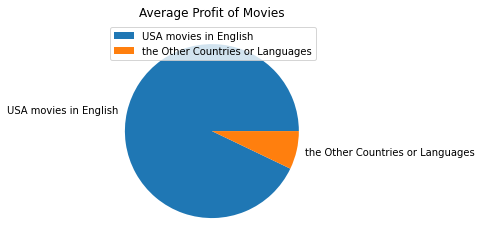

In [64]:
y = np.array([group1.mean(), group2.mean()])

mylabels = ["USA movies in English", "the Other Countries or Languages"]

plt.pie(y, labels = mylabels)
plt.title("Average Profit of Movies")
plt.legend()
plt.show() 

As seen in the pie chart given above, I highly recommend that the studio make a movie in English which will be released in the USA because it is the most profitable market within the budget.

As seen in the bar-line chart given below shows that 'Comedy Drama Music' genre is more profitable than the other genres where both 'Comedy Drama Music' and the others have approximately same budget. So even if there is one movie data in this genre, it can be safely said that, this genre choice can be positive.

In [65]:
CDMgroup2= np.array(test_inbudget[test_inbudget['genres']=='Comedy|Drama|Music']['budget'])

othersgroup2 = np.array(test_inbudget[test_inbudget['genres']!='Comedy|Drama|Music']['budget'])

CDMgroup1= np.array(test_inbudget[test_inbudget['genres']=='Comedy|Drama|Music']['profit'])

othersgroup1 = np.array(test_inbudget[test_inbudget['genres']!='Comedy|Drama|Music']['profit'])

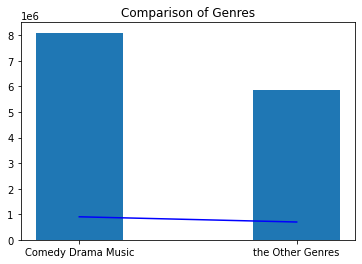

In [71]:
y1=np.array([CDMgroup1.mean(), othersgroup1.mean()])
y2 = np.array ([CDMgroup2.mean(), othersgroup2.mean()])
ax2 = ["Comedy Drama Music", "the Other Genres"]
#colors = {'profit':'blue', 'budget':'red'}         
#labels = list(colors.keys())
#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.plot(ax2, y2, color='blue')
plt.bar(ax2, y1, width = 0.4)
#plt.legend(handles, labels)
plt.title('Comparison of Genres')
plt.show()
